## IN4640 Assignment 1
### Intensity Transformations and Neighborhood Filtering
### Task 02

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
def apply_gamma_lab(image_path, gamma=0.5):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    l_normalized = l / 255.0
    l_corrected = np.power(l_normalized, gamma)
    l_corrected = np.uint8(l_corrected * 255)

    lab_corrected = cv2.merge((l_corrected, a, b))
    img_corrected_bgr = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)
    img_corrected_rgb = cv2.cvtColor(img_corrected_bgr, cv2.COLOR_BGR2RGB)
    
    return img_rgb, img_corrected_rgb, l, l_corrected

original, corrected, l_orig, l_corr = apply_gamma_lab('assets/highlights_and_shadows.jpg', gamma=0.5)

C:\Users\mihin\AppData\Local\Temp\ipykernel_20908\2031844302.py:16: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(l_orig.ravel(), 256, [0, 256], color='gray')
C:\Users\mihin\AppData\Local\Temp\ipykernel_20908\2031844302.py:20: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(l_corr.ravel(), 256, [0, 256], color='blue')


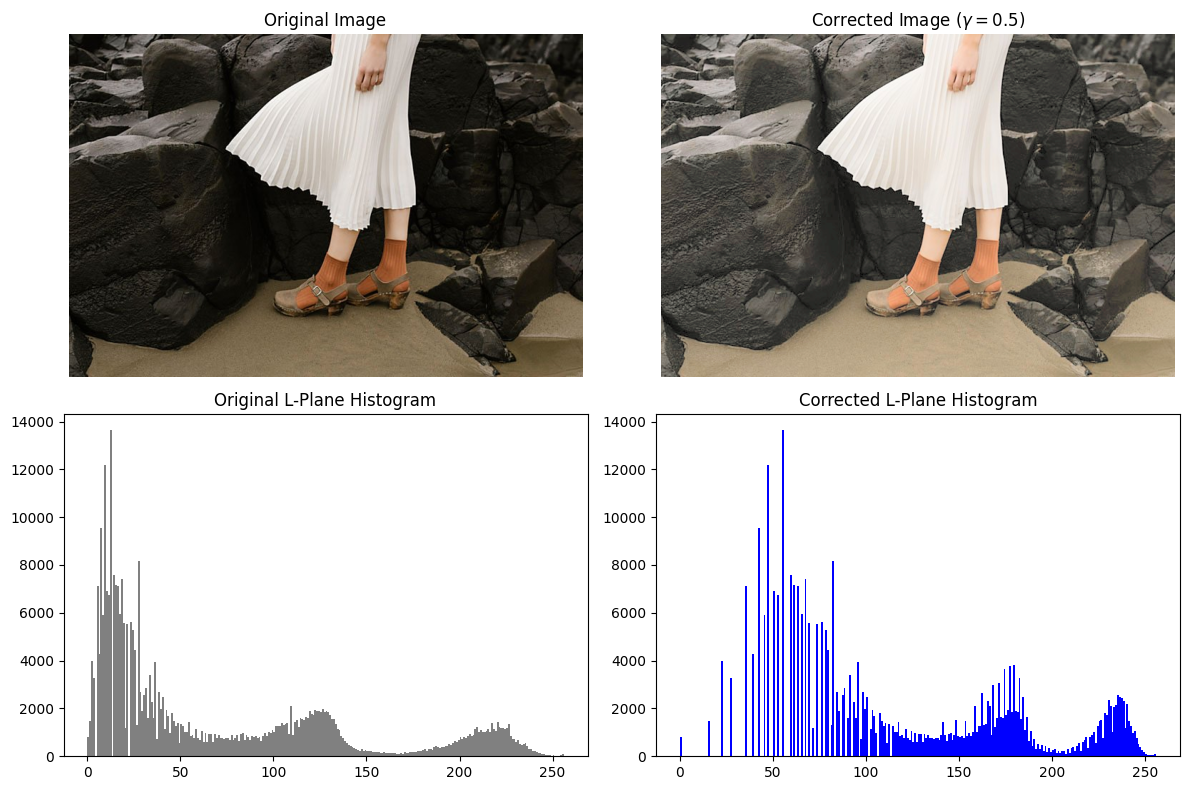

In [8]:
def plot_results(original, corrected, l_orig, l_corr):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title(f"Corrected Image ($\gamma=0.5$)")
    plt.imshow(corrected)
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title("Original L-Plane Histogram")
    plt.hist(l_orig.ravel(), 256, [0, 256], color='gray')
    
    plt.subplot(2, 2, 4)
    plt.title("Corrected L-Plane Histogram")
    plt.hist(l_corr.ravel(), 256, [0, 256], color='blue')

    plt.tight_layout()
    plt.show()

plot_results(original, corrected, l_orig, l_corr)